# Comparison To Matricies from Jonathans Book / Notes ( Continous Beam )

Firstly we will compare the symbolic matricies with those created by Jonathan

## Preamble

In [121]:
from FwtModels import AssumedShapes
import numpy as np
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import y,x,t
import pandas as pd
from IPython.display import display, Latex

## 1 Bending and 1 Torsion

Within Jonathans book (section 11.6) the following equation is 'derived' for a rectangluar wing with one mode in both bending and torsion

$m\left[\begin{array}{cc}{\frac{c s^{5}}{5}} & {\frac{s^{4}}{4}\left(\frac{c^{2}}{2}-c x_{\mathrm{f}}\right)} \\ {\frac{s^{4}}{4}\left(\frac{c^{2}}{2}-c x_{\mathrm{f}}\right)} & {\frac{s^{3}}{3}\left(\frac{c^{3}}{3}-c^{2} x_{\mathrm{f}}+c x_{\mathrm{f}}^{2}\right)}\end{array}\right]\left\{\begin{array}{c}{\dot{q}_{1}} \\ {\ddot{q}_{2}}\end{array}\right\}+\rho V\left[\begin{array}{cc}{\frac{c a_{\mathrm{WS}} 5}{10}} & {0} \\ {-\frac{c^{2} e a_{\mathrm{WS}}^{4}}{8}} & {-\frac{c^{3} s^{3} M_{\theta}}{24}}\end{array}\right]\left\{\begin{array}{c}{\dot{q}_{1}} \\ {\dot{q}_{2}}\end{array}\right\}+\left(\rho V^{2}\left[\begin{array}{cc}{0} & {\frac{c s^{4} a_{\mathrm{W}}}{8}} \\ {0} & {-\frac{e c^{2} s^{3} a_{W}}{6}}\end{array}\right]+\left[\begin{array}{cc}{4 E I s} & {0} \\ {0} & {G J s}\end{array}\right]\right)\left\{\begin{array}{l}{q_{1}} \\ {q_{2}}\end{array}\right\}=\left\{\begin{array}{l}{0} \\ {0}\end{array}\right\}$

Which is the explict version of this equation

$A \ddot{q}+(\rho v \mathbf{B}+\mathbf{D}) \dot{q}+\left(\rho v^{2} \mathbf{C}+\mathbf{E}\right) \boldsymbol{q}=0$

This is slightly different to I I have formulated the equations as my equation was

$\mathbf{A} \ddot{q}+\mathbf{K} q=\mathbf{B} \dot{q} + \mathbf{C} \dot{q}$

Which leads to:

$\mathbf{A} \ddot{q} - \mathbf{B} \dot{q}  +(\mathbf{K}-\mathbf{C}) q=0$

This section will aim to recreate each of these equations from my generalised model by setting the FWTD's size to 0

First, need to generate a symbolic model for the generalised case

In [141]:
# create generalised coordinates
q0,q1 = me.dynamicsymbols('q:2')
q = sym.Matrix([q0,q1])

# create instance of Fwt parameters
p = AssumedShapes.FwtParameters()

# define shape Functions
z_w = q0*y**2 + q1*(x-p.x_f)*y
alpha_w = q1 * y
z_t = z_w.subs(y,p.s_w)
alpha_t = alpha_w.subs(y,p.s_w)

# create the model
sModel = AssumedShapes.SymbolicModel(q,z_w,alpha_w,z_t,alpha_t,p)
sModel.GenerateEoM()

In [148]:
(sym.simplify(sModel.M**-1)*sModel.K).subs(p.s_t,0).eigenvects()

⎡⎛                                                                            
⎢⎜                                                                            
⎢⎜                                                             _______________
⎢⎜   ⎛       2                          2           2⎞        ╱        2  4   
⎢⎜32⋅⎝20⋅EI⋅c  - 60⋅EI⋅c⋅x_f + 60⋅EI⋅x_f  + 9⋅GJ⋅s_w ⎠   16⋅╲╱  1600⋅EI ⋅c  - 
⎢⎜──────────────────────────────────────────────────── - ─────────────────────
⎢⎜               4 ⎛    2                    2⎞                               
⎢⎜      c⋅m_w⋅s_w ⋅⎝19⋅c  - 12⋅c⋅x_f + 12⋅x_f ⎠                               
⎢⎜                                                                            
⎣⎝                                                                            

                                                                              
                                                                              
___________________________________________________

for each matrix set $s_t$ to zero and print the result to compare with the original equation

In [123]:
# Damping Matrix, divide by M_t as this is outside the matrix above
B = sym.latex((-sModel.B.subs(p.s_t,0))/(p.rho*p.V))

In [124]:
# Mass Matrix, divide by rho*V as this is outside the matrix above
M = sym.latex(sym.simplify((sModel.M/p.m_w).subs(p.s_t,0)))

In [125]:
# Aero Stiffness Matrix, divide by rho*V^2 as this is outside the matrix above
C = sym.latex((-sModel.C.subs(p.s_t,0))/(p.rho*p.V**2))

In [126]:
# Structural Stiffness Matrix
K = sym.latex((sModel.K.subs({p.s_t:0, p.k_theta:0})))

comparing against the equation above:

$m\left[\begin{array}{cc}{\frac{c s^{5}}{5}} & {\frac{s^{4}}{4}\left(\frac{c^{2}}{2}-c x_{\mathrm{f}}\right)} \\ {\frac{s^{4}}{4}\left(\frac{c^{2}}{2}-c x_{\mathrm{f}}\right)} & {\frac{s^{3}}{3}\left(\frac{c^{3}}{3}-c^{2} x_{\mathrm{f}}+c x_{\mathrm{f}}^{2}\right)}\end{array}\right]\left\{\begin{array}{c}{\dot{q}_{1}} \\ {\ddot{q}_{2}}\end{array}\right\}+\rho V\left[\begin{array}{cc}{\frac{c a_{\mathrm{WS}} 5}{10}} & {0} \\ {-\frac{c^{2} e a_{\mathrm{WS}}^{4}}{8}} & {-\frac{c^{3} s^{3} M_{\theta}}{24}}\end{array}\right]\left\{\begin{array}{c}{\dot{q}_{1}} \\ {\dot{q}_{2}}\end{array}\right\}+\left(\rho V^{2}\left[\begin{array}{cc}{0} & {\frac{c s^{4} a_{\mathrm{W}}}{8}} \\ {0} & {-\frac{e c^{2} s^{3} a_{W}}{6}}\end{array}\right]+\left[\begin{array}{cc}{4 E I s} & {0} \\ {0} & {G J s}\end{array}\right]\right)\left\{\begin{array}{l}{q_{1}} \\ {q_{2}}\end{array}\right\}=\left\{\begin{array}{l}{0} \\ {0}\end{array}\right\}$

In [127]:
display(Latex(f'$$m{M}+\\rho V{B} + \\left(\\rho V^2{C} + {K} \\right)$$'))

<IPython.core.display.Latex object>

Inspection shows all of these matrices are the same as that from the book with the exception of the aero damping matrix (bottum left reads a_w^4*s in the book which is a mistake as no mechanism in the maths can really raise a_w to the power of anything)

## 2 Bending and 2 Torsion

Within Jonathans book (section 11.6) the following equation is 'derived' for a rectangluar wing with one mode in both bending and torsion the LHS of the equation (free-bending problem) is:

$m\left[\begin{array}{ccc}
{\frac{s^{5} c}{5}} & {\frac{s^{6} c}{6}} & {\frac{s^{4}}{4}\left(\frac{c^{2}}{2}-c x_{f}\right)} & {\frac{s^{5}}{5}\left(\frac{c^{2}}{2}-c x_{f}\right)} \\
{\frac{s^{6} c}{6}} & {\frac{s^{7} c}{7}} & {\frac{s^{5} c}{5}\left(\frac{c^{2}}{2}-c x_{i}\right)} & {\frac{s^{6} c}{6}\left(\frac{c^{2}}{2}-c x_{i}\right)} \\
{\frac{s^{4}}{4}\left(\frac{c^{2}}{2}-c x_{i}\right)} & {\frac{s^{5}}{5}\left(\frac{c^{2}}{2}-c x_{i}\right)} & {\frac{s^{3}}{3}\left(\frac{c^{3}}{3}-c 2 x_{i}+c x_{i}^{2}\right)} & {\frac{s^{4}}{4}\left(\frac{c^{3}}{3}-c 2 x_{i}+c x_{i}^{2}\right)} \\
{\frac{s^{5}}{5}\left(\frac{c^{2}}{2}-c x_{i}\right)} & {\frac{s^{6}}{6}\left(\frac{c^{2}}{2}-c x_{i}\right)} & {\frac{s^{4}}{4}\left(\frac{c^{3}}{3}-c 2 x_{i}+c x_{f}^{2}\right)} & {\frac{s^{5}}{5}\left(\frac{c^{3}}{3}-c 2 x_{i}+c x_{f}^{2}\right)}
\end{array}\right]\mathbf{\ddot{q}} + \left[\begin{array}{cccc}
{4 \mathrm{EIs}} & {6 \mathrm{s}^{2} \mathrm{EI}} & {0} & {0} \\
{6 \mathrm{s}^{2} \mathrm{EI}} & {12 \mathrm{s}^{3} \mathrm{EI}} & {0} & {0} \\
{0} & {0} & {\mathrm{GJs}} & {\mathrm{GJs}^{2}} \\
{0} & {0} & {\mathrm{GJs}^{2}} & {\frac{4}{3} \mathrm{GJs}^{3}}
\end{array}\right]\mathbf{q} = \rho V\left[\begin{array}{cccc}{-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{5}}{10}} & {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{6}}{12}} & {0} & {0} \\ {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{6}}{12}} & {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{7}}{14}} & {0} & {0} \\ {\frac{\mathrm{c}^{2} \mathrm{ea}_{\mathrm{w}} \mathrm{s}^{4}}{8}} & {\frac{\mathrm{c}^{2} \mathrm{ea}_{\mathrm{c}} \mathrm{s}^{5}}{10}} & {\frac{\mathrm{c}^{3} \mathrm{M}_{6} \mathrm{s}^{3}}{24}} & {\frac{\mathrm{c}^{3} \mathrm{M}_{6} \mathrm{s}^{4}}{32}} \\ {\frac{\mathrm{c}^{2} \mathrm{ea}_{0}}{10}} & {\frac{\mathrm{c}^{2} \mathrm{ea}_{0} \mathrm{s}^{6}}{12}} & {\frac{\mathrm{c}^{3} \mathrm{M}_{6} \mathrm{s}^{4}}{32}} & {\frac{\mathrm{c}^{3} \mathrm{M}_{6} \mathrm{s}^{5}}{40}}\end{array}\right]\mathbf{\dot{q}} + \rho V^{2}\left[\begin{array}{cccc}
{0} & {0} & {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{4}}{8}} & {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{5}}{10}} \\
{0} & {0} & {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{5}}{10}} & {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{6}}{12}} \\
{0} & {0} & {\frac{\mathrm{c}^{2} \mathrm{ea}_{\mathrm{w}} \mathrm{s}^{3}}{6}} & {\frac{\mathrm{c}^{2} \mathrm{ea}_{\mathrm{w}} \mathrm{s}^{4}}{8}} \\
{0} & {0} & {\frac{\mathrm{c}^{2} \mathrm{ea}_{\mathrm{w}} \mathrm{s}^{4}}{8}} & {\frac{\mathrm{c}^{2} \mathrm{ea}_{\mathrm{w}} \mathrm{s}^{5}}{10}}
\end{array}\right]\mathbf{q}$

recreating this with my library


In [128]:
# create generalised coordinates
q0,q1,q2,q3 = me.dynamicsymbols('q:4')
q = sym.Matrix([q0,q1,q2,q3])

# create instance of Fwt parameters
p = AssumedShapes.FwtParameters()

# define shape Functions
z_w = q0*y**2 + q1*y**3 + q2*(x-p.x_f)*y + q3*(x-p.x_f)*y**2
alpha_w = q2 * y + q3*y**2
z_t = z_w.subs(y,p.s_w)
alpha_t = alpha_w.subs(y,p.s_w)

# create the model
sModel = AssumedShapes.SymbolicModel(q,z_w,alpha_w,z_t,alpha_t,p)
sModel.GenerateEoM()

for each matrix set $s_t$ to zero and print the result to compare with the original equation

In [129]:
# Mass Matrix, divide by rho*V as this is outside the matrix above
M = sym.latex(sym.simplify((sModel.M/p.m_w).subs(p.s_t,0)))

# Structural Stiffness Matrix
K = sym.latex((sModel.K.subs({p.s_t:0, p.k_theta:0})))

# Damping Matrix, divide by M_t as this is outside the matrix above
B = sym.latex((sModel.B.subs(p.s_t,0))/(p.rho*p.V))

# Aero Stiffness Matrix, divide by rho*V^2 as this is outside the matrix above
C = sym.latex((sModel.C.subs(p.s_t,0))/(p.rho*p.V**2))

display(Latex(f'$$m{M}'+'\\mathbf{\\ddot{q}}+'+K+'\\mathbf{q}=\\rho V'+ B + '\\mathbf{\\dot{q}} + \\rho V^2'+ C +'\\mathbf{q}$$'))

<IPython.core.display.Latex object>

As a reminded Jonathan's equations were

$m\left[\begin{array}{ccc}
{\frac{s^{5} c}{5}} & {\frac{s^{6} c}{6}} & {\frac{s^{4}}{4}\left(\frac{c^{2}}{2}-c x_{f}\right)} & {\frac{s^{5}}{5}\left(\frac{c^{2}}{2}-c x_{f}\right)} \\
{\frac{s^{6} c}{6}} & {\frac{s^{7} c}{7}} & {\frac{s^{5} c}{5}\left(\frac{c^{2}}{2}-c x_{i}\right)} & {\frac{s^{6} c}{6}\left(\frac{c^{2}}{2}-c x_{i}\right)} \\
{\frac{s^{4}}{4}\left(\frac{c^{2}}{2}-c x_{i}\right)} & {\frac{s^{5}}{5}\left(\frac{c^{2}}{2}-c x_{i}\right)} & {\frac{s^{3}}{3}\left(\frac{c^{3}}{3}-c 2 x_{i}+c x_{i}^{2}\right)} & {\frac{s^{4}}{4}\left(\frac{c^{3}}{3}-c 2 x_{i}+c x_{i}^{2}\right)} \\
{\frac{s^{5}}{5}\left(\frac{c^{2}}{2}-c x_{i}\right)} & {\frac{s^{6}}{6}\left(\frac{c^{2}}{2}-c x_{i}\right)} & {\frac{s^{4}}{4}\left(\frac{c^{3}}{3}-c 2 x_{i}+c x_{f}^{2}\right)} & {\frac{s^{5}}{5}\left(\frac{c^{3}}{3}-c 2 x_{i}+c x_{f}^{2}\right)}
\end{array}\right]\mathbf{\ddot{q}} + \left[\begin{array}{cccc}
{4 \mathrm{EIs}} & {6 \mathrm{s}^{2} \mathrm{EI}} & {0} & {0} \\
{6 \mathrm{s}^{2} \mathrm{EI}} & {12 \mathrm{s}^{3} \mathrm{EI}} & {0} & {0} \\
{0} & {0} & {\mathrm{GJs}} & {\mathrm{GJs}^{2}} \\
{0} & {0} & {\mathrm{GJs}^{2}} & {\frac{4}{3} \mathrm{GJs}^{3}}
\end{array}\right]\mathbf{q} = \rho V\left[\begin{array}{cccc}{-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{5}}{10}} & {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{6}}{12}} & {0} & {0} \\ {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{6}}{12}} & {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{7}}{14}} & {0} & {0} \\ {\frac{\mathrm{c}^{2} \mathrm{ea}_{\mathrm{w}} \mathrm{s}^{4}}{8}} & {\frac{\mathrm{c}^{2} \mathrm{ea}_{\mathrm{c}} \mathrm{s}^{5}}{10}} & {\frac{\mathrm{c}^{3} \mathrm{M}_{6} \mathrm{s}^{3}}{24}} & {\frac{\mathrm{c}^{3} \mathrm{M}_{6} \mathrm{s}^{4}}{32}} \\ {\frac{\mathrm{c}^{2} \mathrm{ea}_{0}}{10}} & {\frac{\mathrm{c}^{2} \mathrm{ea}_{0} \mathrm{s}^{6}}{12}} & {\frac{\mathrm{c}^{3} \mathrm{M}_{6} \mathrm{s}^{4}}{32}} & {\frac{\mathrm{c}^{3} \mathrm{M}_{6} \mathrm{s}^{5}}{40}}\end{array}\right]\mathbf{\dot{q}} + \rho V^{2}\left[\begin{array}{cccc}
{0} & {0} & {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{4}}{8}} & {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{5}}{10}} \\
{0} & {0} & {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{5}}{10}} & {-\frac{\mathrm{ca}_{\mathrm{w}} \mathrm{s}^{6}}{12}} \\
{0} & {0} & {\frac{\mathrm{c}^{2} \mathrm{ea}_{\mathrm{w}} \mathrm{s}^{3}}{6}} & {\frac{\mathrm{c}^{2} \mathrm{ea}_{\mathrm{w}} \mathrm{s}^{4}}{8}} \\
{0} & {0} & {\frac{\mathrm{c}^{2} \mathrm{ea}_{\mathrm{w}} \mathrm{s}^{4}}{8}} & {\frac{\mathrm{c}^{2} \mathrm{ea}_{\mathrm{w}} \mathrm{s}^{5}}{10}}
\end{array}\right]\mathbf{q}$

A comparison of the two equations shows they are exactly the same except for a $c2$ term in each of the terms M[2:,2:] in Jonathans which are a $c^2$ in mine

Looking at were these are derived from in Jonathans, namely:

$\frac{\mathrm{d}}{\mathrm{dt}}\left(\frac{\partial T}{\partial \dot{q}_{4}}\right)=m\left[\frac{s^{5}}{5}\left(\frac{c^{2}}{2}-\alpha_{t}\right) \ddot{\mathrm{q}}_{1}+\frac{s^{6}}{6}\left(\frac{\mathrm{c}^{2}}{2}-\mathrm{cx}_{t}\right) \ddot{\mathrm{q}}_{2}+\frac{\mathrm{s}^{4}}{4}\left(\frac{\mathrm{c}^{3}}{3}-\mathrm{c}^{2} \mathrm{x}_{\mathrm{f}}+\mathrm{cx}_{\mathrm{f}}^{2}\right) \ddot{\mathrm{q}}_{3}+\frac{\mathrm{s}^{5}}{5}\left(\frac{\mathrm{c}^{3}}{3}-\mathrm{c}^{2} \mathrm{x}_{\mathrm{t}}+\mathrm{cx}_{\mathrm{f}}^{2}\right) \ddot{\mathrm{q}}_{4}\right]$

it is clear this is just an presentation error in the final matrix, and it should infact be $c^2$

## Test a couple of Numeric Models

### Compare Frequency values for a SDoF system

with Jonathan's book, in section 3.2.1, a model is built of a continous wing with a single assumed shape:

$z(y, t)=\psi(y) q(t)=\left(\frac{y}{s}\right)^{2} q(t)$

The natural frequency of this system is found to be $\omega=4.47 \sqrt{\frac{E I}{\mu s^{4}}}$ and the exact answer is shown as $\omega=3.516 \sqrt{\frac{E I}{\mu s^{4}}}$

#### Compare model with the answer for one assumed shape in bending

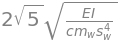

In [138]:
# create generalised coordinates
q0 = me.dynamicsymbols('q0') 
q = sym.Matrix([q0])

# create instance of Fwt parameters
p = AssumedShapes.FwtParameters()
p.ThetaLocked = True

# define shape Functions
z_w = q0*y**2
alpha_w = sym.Rational(0,1)

# FWT is locked so is parrallel to the end of the main wing
z_t = z_w.subs(y,p.s_w) + z_w.diff(t).subs(y,p.s_w)*y
alpha_t = alpha_w.subs(y,p.s_w)

# create the model
sModel = AssumedShapes.SymbolicModel(q,z_w,alpha_w,z_t,alpha_t,p)
sModel.GenerateEoM()

eSet = (sModel.M**-1*sModel.K).eigenvals()
eVal = sym.sqrt(((eSet.popitem())[0]).subs({p.k_theta:0,p.s_t:0}))
eVal

#### What about 2 shapes for bending

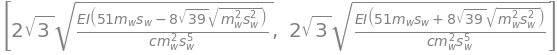

In [131]:
# create generalised coordinates
q0,q1 = me.dynamicsymbols('q0,q1') 
q = sym.Matrix([q0,q1])

# create instance of Fwt parameters
p = AssumedShapes.FwtParameters()
p.ThetaLocked = True

# define shape Functions
z_w = q0*y**2+q1*y**3
alpha_w = sym.Rational(0,1)

# FWT is locked so is parrallel to the end of the main wing
z_t = z_w.subs(y,p.s_w) + z_w.diff(t).subs(y,p.s_w)*y
alpha_t = alpha_w.subs(y,p.s_w)

# create the model
sModel = AssumedShapes.SymbolicModel(q,z_w,alpha_w,z_t,alpha_t,p)
sModel.GenerateEoM()



eSet = (sModel.M**-1*sModel.K).eigenvals()
freqs = []
for key,value in eSet.items():
    freqs.append(sym.simplify(sym.sqrt(key.subs({p.k_theta:0,p.s_t:0}))))
freqs

Thats getting more complicated and doesnt really simplify well. So lets swap to numerical analysis.


If we set $E,I,m_w,s_w,c$ to 1 the frequecy of the lowest mode shape should start at 4.47 and tend to 3.516

In [132]:
# create generalised coordinates
q0,q1,q2 = me.dynamicsymbols('q:3') 
q = sym.Matrix([q0,q1,q2])

# create instance of Fwt parameters
p = AssumedShapes.FwtParameters()
p.ThetaLocked = True
p.EI.value = 1
p.m_w.value = 1
p.s_w.value = 1
p.c.value = 1


# created assumed shapes for ever higher order models then create a numerical model and find the minimium modal frequency
Freqs = []
Vecs = []
Df = pd.DataFrame();
for i in np.arange(0,3):
    # define shape Functions
    z_w = sym.Rational(0,1)
    for j in np.arange(0,i+1):
        z_w = z_w + q[j]*y**(2+j)

    alpha_w = sym.Rational(0,1)

    # FWT is locked so is parrallel to the end of the main wing
    z_t = z_w.subs(y,p.s_w) + z_w.diff(t).subs(y,p.s_w)*y
    alpha_t = alpha_w.subs(y,p.s_w)

    # create the model
    sModel = AssumedShapes.SymbolicModel(q,z_w,alpha_w,z_t,alpha_t,p)
    sModel.GenerateEoM()

    nModel = sModel.createNumericInstance()

    df = nModel.FreeVibrationValsPd()
    withS = 's' if i>0 else ''
    df['Shapes'] = f'{i+1} Shape{withS}'
    df['Mode'] = df.index
    Df = pd.concat((Df,df),axis=0)

In [133]:
pd.options.display.float_format = '{:,.2f}'.format
Df['% Error'] = ((Df['Freq'] / 3.516) -1)*100

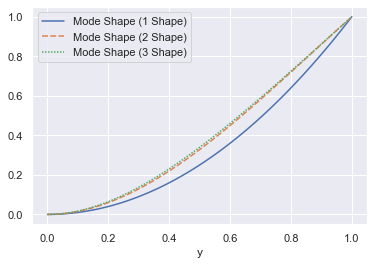

In [134]:
# plot mode shapes
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# make a data frame to calulaate the positon at each y station
ModeDf = pd.DataFrame()
ModeDf['y'] = np.linspace(0,1,100)
ShapeDf = Df[Df['Mode']==0].reset_index(drop=True)
# make a new series for each MOde shape to show as a combination of the values in ShapeDf
for i in np.arange(0,3):
    ModeDf[f'Mode Shape ({i+1} Shape)'] = ModeDf['y'] **2 * ShapeDf['Comp 0'][i] + ModeDf['y'] **3 * ShapeDf['Comp 1'][i] + ModeDf['y'] **4 * ShapeDf['Comp 2'][i]

# set the index of the data frame
ModeDf = ModeDf.set_index('y')

# ensure the end of the beam is deflecting up
cols = list(ModeDf)
for i in range(0,len(cols)):
    if ModeDf[cols[i]].iloc[-1] < 0:
        ModeDf[cols[i]] = ModeDf[cols[i]]*-1

#normalise shapes to max value
ModeDf = ModeDf.apply(lambda x : x/x.max())

sns.lineplot(data = ModeDf)
